In [5]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
path = r"F:\Learnings\DataScientist\GUVI-1\Singapore flat" 
file_list = glob.glob(path + r"/*.csv")
csv_list = []
for file in file_list:
    csv_list.append(pd.read_csv(file))

In [7]:
df = pd.concat(csv_list, ignore_index=True)

In [8]:
df.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207937 entries, 0 to 207936
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                207937 non-null  object 
 1   town                 207937 non-null  object 
 2   flat_type            207937 non-null  object 
 3   block                207937 non-null  object 
 4   street_name          207937 non-null  object 
 5   storey_range         207937 non-null  object 
 6   floor_area_sqm       207937 non-null  float64
 7   flat_model           207937 non-null  object 
 8   lease_commence_date  207937 non-null  int64  
 9   remaining_lease      207937 non-null  object 
 10  resale_price         207937 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 17.5+ MB


In [10]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [11]:
df.duplicated().sum()

306

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(207631, 11)

In [14]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

1. Top 15 Town by Resale Price

In [11]:
top_15 = df.groupby('town')['resale_price'].size().reset_index().sort_values(by='resale_price',ascending=False).head(15)

<Axes: title={'center': 'Top 15 Towns by Resale price'}, xlabel='town', ylabel='resale_price'>

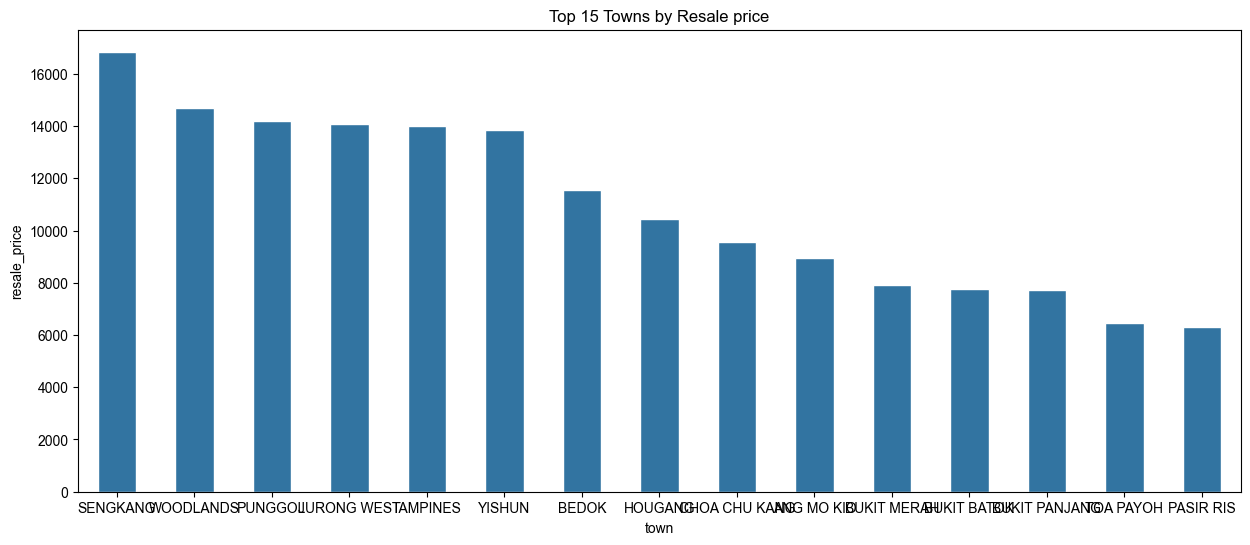

In [12]:
plt.figure(figsize=(15,6))
plt.title("Top 15 Towns by Resale price")
sns.set(font_scale=0.6)
sns.barplot(x = 'town', y ='resale_price',data=top_15,width = 0.5)

<Axes: xlabel='flat_model', ylabel='resale_price'>

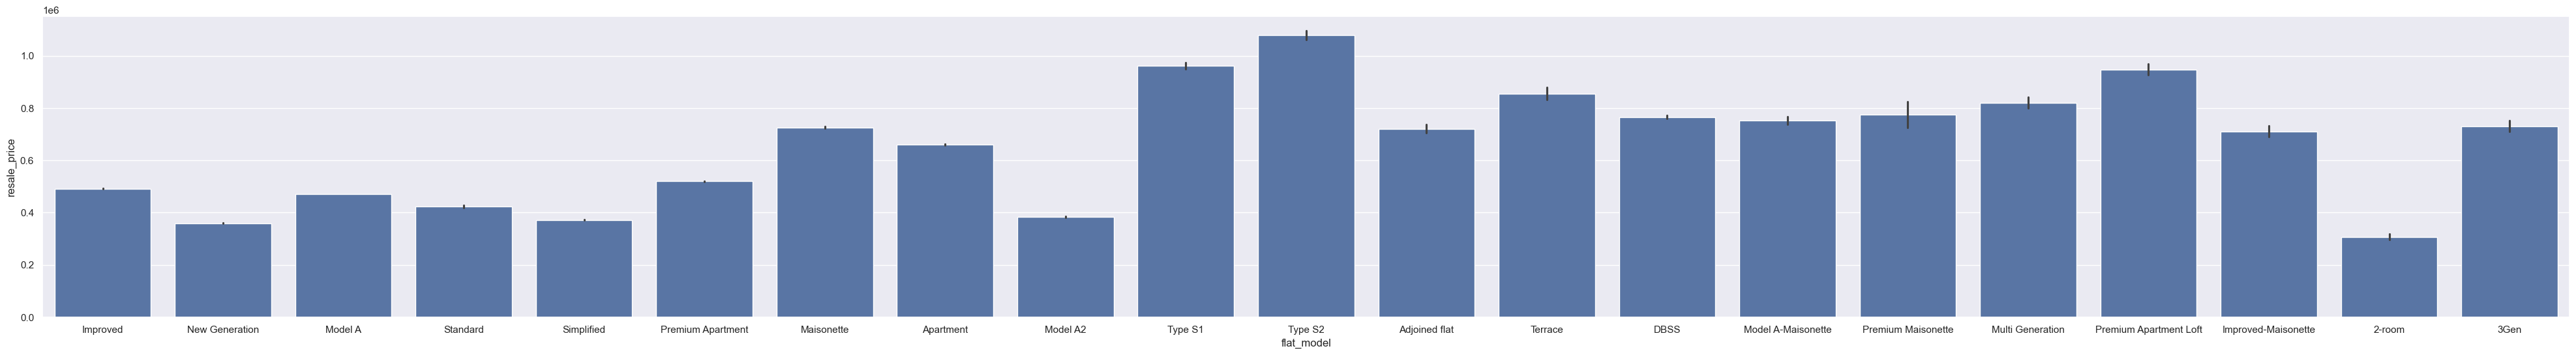

In [13]:
plt.figure(figsize=(50,6))
sns.set(font_scale=1)
sns.barplot(x = 'flat_model',y='resale_price',data=df)

##### Observation:From this above plot it can be observed that Type S2, Type S1 and Premium Apartments are the flat models with High resale prices

Text(0.5, 1.0, 'Resale Price Distribution 2015-Till Date')

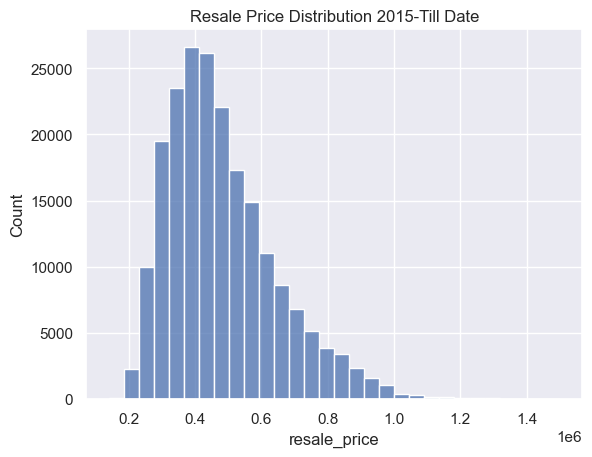

In [14]:
sns.histplot(df['resale_price'],bins=30)
plt.title('Resale Price Distribution 2015-Till Date')

Observation:
The flats resale prices are mostly distributed around 4 lakhs SGD

In [15]:
df['year'] = pd.to_datetime(df['month']).dt.year
df = df.drop('month',axis=1)

In [16]:
import re
def lease(x):
    num_list = re.findall(r'\d+',str(x))
    try:
        return (int(num_list[0])* 12) + int(num_list[1])
    except:
        return int(num_list[0]) * 12


In [17]:
df['remaining_lease_months']= df['remaining_lease'].apply(lease)

In [18]:
df.drop('remaining_lease',axis=1,inplace=True)

In [19]:
df.tail(15)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,remaining_lease_months
207922,YISHUN,5 ROOM,386,YISHUN RING RD,01 TO 03,122.0,Improved,1988,608000.0,2024,762
207923,YISHUN,5 ROOM,298,YISHUN ST 20,04 TO 06,111.0,Improved,2000,583888.0,2024,911
207924,YISHUN,5 ROOM,223,YISHUN ST 21,07 TO 09,134.0,Model A,1986,660000.0,2024,734
207925,YISHUN,5 ROOM,213,YISHUN ST 21,04 TO 06,121.0,Improved,1985,615000.0,2024,721
207926,YISHUN,5 ROOM,229,YISHUN ST 21,07 TO 09,121.0,Improved,1985,610088.0,2024,726
207927,YISHUN,5 ROOM,505C,YISHUN ST 51,04 TO 06,112.0,Improved,2016,640000.0,2024,1095
207928,YISHUN,5 ROOM,513C,YISHUN ST 51,07 TO 09,113.0,Improved,2018,675000.0,2024,1119
207929,YISHUN,5 ROOM,504B,YISHUN ST 51,07 TO 09,113.0,Improved,2016,723000.0,2024,1095
207930,YISHUN,5 ROOM,505D,YISHUN ST 51,13 TO 15,113.0,Improved,2016,710000.0,2024,1095
207931,YISHUN,5 ROOM,602,YISHUN ST 61,07 TO 09,121.0,Improved,1987,688000.0,2024,749


In [22]:
df.dtypes

town                       object
flat_type                  object
block                      object
street_name                object
storey_range               object
floor_area_sqm            float64
flat_model                 object
lease_commence_date         int64
resale_price              float64
year                        int32
remaining_lease_months      int64
dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col_list = ['town','flat_type','street_name','storey_range','flat_model','block']
for column in col_list:
    df[column] = le.fit_transform(df[column])


In [24]:
df.dtypes

town                        int32
flat_type                   int32
block                       int32
street_name                 int32
storey_range                int32
floor_area_sqm            float64
flat_model                  int32
lease_commence_date         int64
resale_price              float64
year                        int32
remaining_lease_months      int64
dtype: object

In [25]:
df.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,remaining_lease_months
0,0,2,261,16,2,60.0,5,1986,255000.0,2015,840
1,0,2,1615,13,0,68.0,12,1981,275000.0,2015,780
2,0,2,215,16,0,69.0,12,1980,285000.0,2015,768
3,0,2,1257,13,0,68.0,12,1979,290000.0,2015,756
4,0,2,1645,13,2,68.0,12,1980,290000.0,2015,768


In [27]:
df.to_csv('data.csv',index=False)

In [28]:
df.corr()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,remaining_lease_months
town,1.000000,0.111096,0.052040,0.666741,-0.052535,0.101286,-0.091744,0.219161,-0.040484,0.028892,0.218179
flat_type,0.111096,1.000000,0.057778,0.072235,0.040978,0.951078,-0.331371,0.221707,0.616884,-0.005699,0.227829
block,0.052040,0.057778,1.000000,0.133153,-0.003575,0.062279,-0.017942,0.123849,-0.009087,0.020764,0.122729
street_name,0.666741,0.072235,0.133153,1.000000,-0.076728,0.091521,-0.095189,0.104033,-0.024105,0.020098,0.103454
storey_range,-0.052535,0.040978,-0.003575,-0.076728,1.000000,-0.003812,-0.039822,0.276320,0.362869,0.040510,0.273221
floor_area_sqm,0.101286,0.951078,0.062279,0.091521,-0.003812,1.000000,-0.354277,0.157854,0.604923,-0.015684,0.164952
flat_model,-0.091744,-0.331371,-0.017942,-0.095189,-0.039822,-0.354277,1.000000,-0.127357,-0.234274,-0.029261,-0.125490
lease_commence_date,0.219161,0.221707,0.123849,0.104033,0.276320,0.157854,-0.127357,1.000000,0.375596,0.186042,0.983820
resale_price,-0.040484,0.616884,-0.009087,-0.024105,0.362869,0.604923,-0.234274,0.375596,1.000000,0.281492,0.330280
year,0.028892,-0.005699,0.020764,0.020098,0.040510,-0.015684,-0.029261,0.186042,0.281492,1.000000,0.009911


<Axes: >

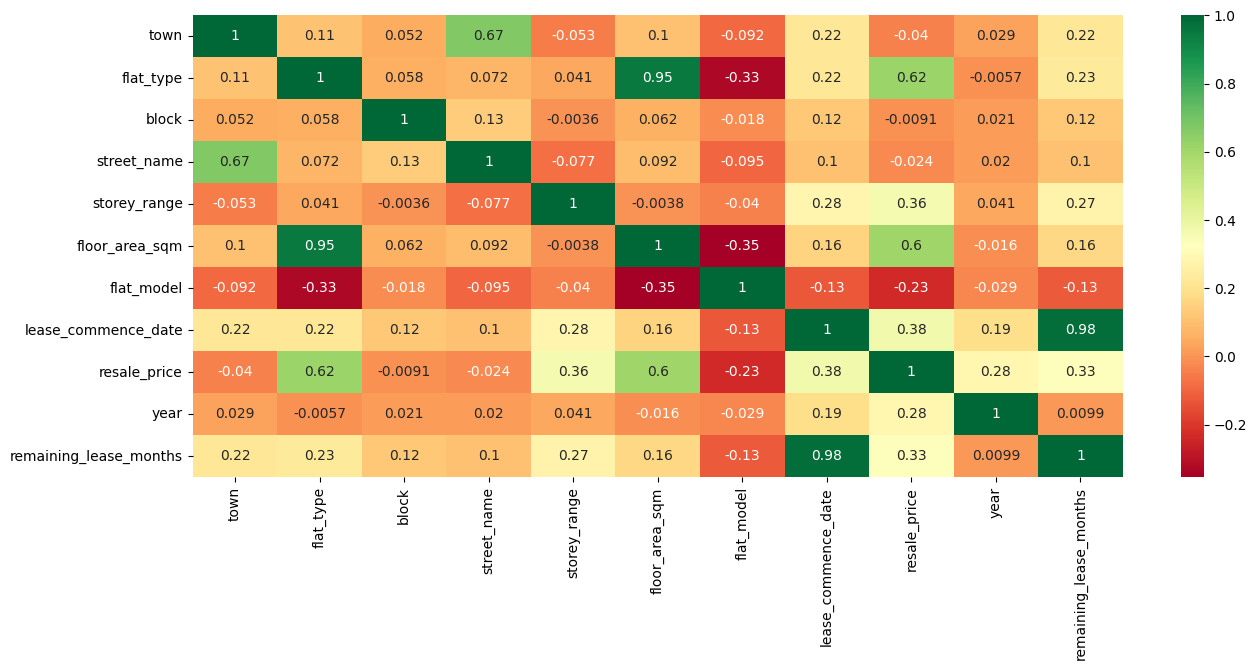

In [28]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')